In [2]:
import pandas as pd

In [3]:
import plotly.graph_objects as go
from plotly.offline import plot

In [8]:
import seaborn as sns

In [1]:
file = r'C:\Heri\GitHub\Crypto\01-APIS\01-Yahoo-Finance\crypto_adj_close.csv'

In [5]:
# Load the data
data = pd.read_csv(file, index_col="Date", parse_dates=True)

In [6]:
# Calculate the correlation matrix
corr = data.corr()

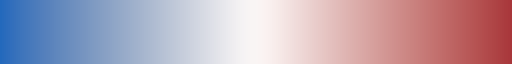

In [9]:
sns.color_palette("vlag", as_cmap=True)

In [12]:
seaborn_palette = sns.color_palette("vlag", as_cmap=True)

In [20]:
# Convert the Seaborn colorscale to a Plotly-compatible format
colorscale = [[i/255, f'rgb({int(r*255)}, {int(g*255)}, {int(b*255)})'] for i, (r, g, b) in enumerate(seaborn_palette.colors)]


In [22]:
fig = go.Figure(
    data=go.Heatmap(
        z=corr.values,
        x=corr.columns,
        y=corr.index,
        colorscale=colorscale,
        text=[[f"{val:.2f}" for val in row] for row in corr.values],
        texttemplate="%{text}",
        textfont={"size": 5, "color": "black"}
    )
)

fig.update_layout(
    title={
        'text': 'Correlation Map of Crypto Data',
        'font': {
            'size': 24
        }
    },
    autosize=False,
    width=1000,
    height=1000,
    margin=dict(l=100, r=100, t=100, b=100)
)

fig.update_xaxes(tickfont=dict(size=8))
fig.update_yaxes(tickfont=dict(size=8))

In [15]:
plot(fig, filename='Heatmap.html')

'Heatmap.html'